<a href="https://colab.research.google.com/github/hhhhhhhhhhhhhhhhho/AI/blob/master/Neural_Network/optimizer_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torchvision.datasets as data
import torchvision.transforms as transforms
import random

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' # GPU 가 없다면 CPU 로 실행시키겠다는 말 . 

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

torch 로 데이터를 가져와서 사용하는 경우에는 GPU 를 사용한다. 

In [5]:
#학습파라미터 설정
learning_rate = 0.001
training_epochs = 15
batch_size = 100

root 저장경로 학습/테스트 데이터 선택: True 학습데이터 transform:download:

In [7]:
mnist_train = data.MNIST(root='MNIST_data/',
                         train=True,
                         transform=transforms.ToTensor(),
                         download=True)

mnist_test = data.MNIST(root='MNIST_data/',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...



Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [15]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True, #data 를 섞는 것. 이미지의 경우 편향되는 경우가 있기 때문에.
                                          drop_last=True) #batch 를 나누다 보면 100개의 data 를 10개의 batch 로 나누면 괜찮은데 데이터가 105개 있다면 마지막은 다섯개만 존재하기 때문에
                                                        # 이 짝이 맞지 않는 데이터를 버릴 것인지, 학습 시킬 것인지에 관한 것.

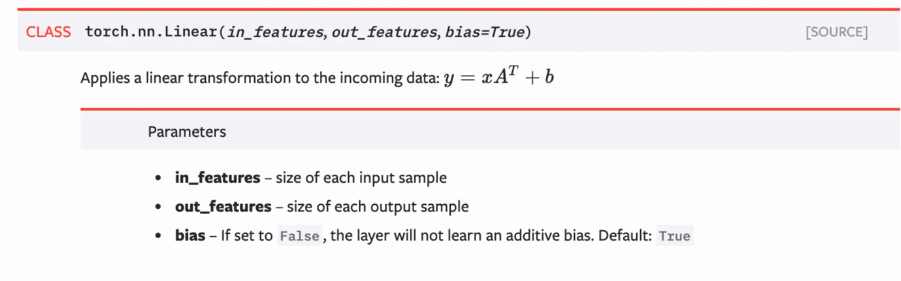

In [16]:
linear = torch.nn.Linear(784,10,bias=True)

In [17]:
torch.nn.init.normal_(linear.weight)

Parameter containing:
tensor([[-0.1953, -0.4404,  0.0139,  ...,  0.7510,  1.5190,  0.9637],
        [ 0.4146, -1.0660, -0.9969,  ..., -0.3259, -0.2695, -1.3316],
        [ 0.2600, -1.1821,  0.0065,  ...,  1.0648, -1.2251,  0.9841],
        ...,
        [ 0.0279, -1.7242, -1.1723,  ...,  1.3651, -0.0689, -0.7931],
        [ 0.0952,  0.1939,  0.1636,  ..., -1.0489,  0.6224, -1.7181],
        [ 2.6504,  0.6297, -1.6571,  ..., -0.0781, -1.1398, -0.8711]],
       requires_grad=True)

In [20]:
model = torch.nn.Sequential(linear).to(device)

In [22]:
loss = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

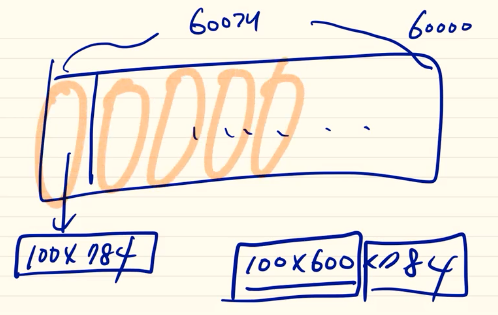

data loader 에 의해 잘려진 형태

In [25]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
  avg_cost = 0
  for X, Y in data_loader:
    # ( 1000,1, 28, 28 ) 크기의 텐서를 (1000, 784 ) 크기의 텐서로 변형 784-dimension , vector 가 나온다.
    X = X.view(-1, 28*28).to(device)
    # one-hot encoding 되어있지 않음.
    Y = Y.to(device)

    #gradient 초기화
    optimizer.zero_grad()
    #Forward 계산
    hypothesis = model(X)
    #Error 계산
    cost= loss(hypothesis, Y )
    #BackParopagation
    cost.backward()
    #가중치 갱신
    optimizer.step()

    #평균 Error 계산
    avg_cost += cost / total_batch

  print('Epoch :', '%04d' % (epoch + 1), 'cost = ' , '{:.9f}'.format(avg_cost))

print("Learning Finished")


Epoch : 0001 cost =  14.416427612
Epoch : 0002 cost =  12.303804398
Epoch : 0003 cost =  10.895294189
Epoch : 0004 cost =  9.730859756
Epoch : 0005 cost =  8.741600037
Epoch : 0006 cost =  7.915610790
Epoch : 0007 cost =  7.235322952
Epoch : 0008 cost =  6.667442322
Epoch : 0009 cost =  6.180302143
Epoch : 0010 cost =  5.753336906
Epoch : 0011 cost =  5.374924660
Epoch : 0012 cost =  5.037975311
Epoch : 0013 cost =  4.737228870
Epoch : 0014 cost =  4.468307972
Epoch : 0015 cost =  4.227563381
Learning Finished


In [31]:
#Test the model using test sets
with torch.no_grad():
  #float() : GPU 에 있는 data 를 CPU 로 내리기
  X_test = mnist_test.test_data.view(-1,28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = model(X_test)
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.42149999737739563


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [50]:
# random test
r = random.randint(0, len(mnist_test)- 1)
X_single_data = mnist_test.data[r:r+1].view(-1,28*28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r+1].to(device)

print('Label :', Y_single_data.item())
single_prediction = model(X_single_data)
print('Prediction: ',torch.argmax(single_prediction, 1).item())

Label : 5
Prediction:  0


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([5], device='cuda:0')


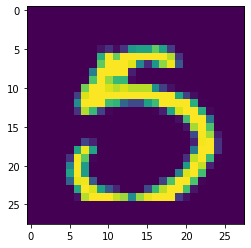

In [51]:
import matplotlib.pyplot as plt
plt.imshow(X_single_data.reshape(28,28).cpu())
print(Y_single_data)